## Equation de diffusion du champ magnétique

En reprenant les équations de Maxwell suivantes, nous pouvons montrer que le champ magnétique $\mathbf{B}$ obéit à une équation de diffusion. En se rappelant la loi d'Ohm $\mathbf{J} = \sigma \mathbf{E}$,
$$\nabla \times {\bf E} = -\partial_t {\bf B}\\
\nabla \times {\bf B} =\mu_0 {\bf J}\\
\nabla \cdot {\bf B}=0
$$
ensuite en subsituant $\mathbf{E}$ par $\dfrac{\mathbf{J}}{\sigma}$  puis $\mathbf{J}$ par $\dfrac{1}{\mu_0} \nabla \times {\bf B}$ dans le première équation, et en sachant que $\nabla \times(\nabla \times {\bf B}) = \nabla (\nabla \cdot {\bf B}) - \Delta \mathbf{B} = - \Delta \mathbf{B}$, nous obtenons l'équation de diffusion:
$$ \partial_t \bf{B} - \dfrac{1}{\sigma \mu_0} \Delta B = 0$$

## Description du problème et conditions aux bords

<img src='./figures/diagram.png' width='400px'>

#### Figure 1: Schéma de la géométrie considérée. Le conducteur est homogène et infini dans la direction z.

La zone sur laquelle nous allons résoudre l'équation diffusion du champ magnétique est la région grisée (ouverte) sur la Figure 1. Comme le problème est symétrique selon z, nous allons résoudre l'équation sur une tranche (bidimentionelle, orthogonale à la direction z) de la région grise. De plus, toujours à cause de la symétrie selon z, tous les courants dans le problème seront toujours de composante z nulle. Par conséquent, le champ magnétique est en tout instant et en tout point orienté selon z et nous allons donc résoudre l'équation pour la composante $B_z = |\mathbf{B}|$ uniquement.

Notons que le bord de la région grisée se sépare en deux parties: les contours des carrés de 0.5 et 1.5cm de côtés (que nous appellerons bords internes et externes, respectivement). Le bord externe est parcouru par un courant total de surface $J=1A/m$, nous pouvons alors calculer le champ magnétique produit dans un voisinage infinitésimal d'un point du bord avec une boucle d'ampère rectangulaire orthogonale au courant, traversée par celui-ci et avec deux côtés de longueur quelconque $L$ orientés selon z et deux côtés de longueur infinitésimale orthogonaux à l'axe z. Nous trouvons: 

$$ B\times L = \oint \mathbf B\cdot d\mathbf l = \iint (\nabla \times \mathbf B) \cdot d\mathbf S = \iint \mu_0\mathbf J \cdot d\mathbf S = -\mu_0 J\times L $$
$$ B = -\mu_0 J = -\mu_0 \times 1 A/m $$

Ceci donne la valeur du champ magnétique à une distance infitésimalement proche du bord, qui prend donc cette valeur fixe immédiatement après que le courant passe à $1A/m$. Cela nous donne une condition de Dirichlet pour le bord externe.

Concernant le bord interne, nous pouvons nous guider avec l'analogie de la chaleur dans laquelle la composante $B_z$ du champ magnétique est la température. Cette analogie est rigoureuse mathématiquement car dans les deux cas nous avons la même équation pour un champ scalaire. Pour trouver la condition sur le bord interne, il faut remarquer que le supraconducteur est caractérisé par une conductivité électrique infinie et que cela implique que la constante $1/\mu\sigma$ est nulle dans ce milieu. Le champ magnétique conserve donc sa valeur initiale, fixée à $0$, car 

$$ \partial_t \mathbf{B} = \frac{1}{\mu_0\sigma} \mathbf{\Delta} \mathbf{B} = 0$$

Le supraconducteur se comporte donc comme un isolant thermique dans l'analogie de la chaleur (sa température met un temps infini à augmenter). La condition au bord dans ce cas est que le flux de chaleur vers l'isolant est nul, autrement dit, par la loi de Fourier, que le produit scalaire entre le gradient de la température et la normale au côté du carré est nul sur le bord interne. Nous avons donc la condition de Neumann $(\nabla B)\cdot \mathbf n = 0$ pour le bord interne. 

## Evolution au cours du temps - Méthode d'Euler

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Il nous implémentons le champ magnétique dans une matrice $(N+1) \times (N-M)$.

In [2]:
sigma = 5.96*10**7
mu = 1.26*10**-6

# parametres
T = 0.0125
T2 = 0.00125
L = 0.015
N = 60

dx = L/(2*N+1)
dt_max = 1/4*(sigma*mu)*dx**2   # condition de stabilité

print("dt_max =", dt_max)

dt = 2.5*10**-7    # imposé
nt = int(T/dt)
M = 20   #int(N/3)

print("nt =", nt)

B0 = numpy.zeros((N-M+2,N+3))      # condition initiale
B0[0,:] = -mu*numpy.ones(N+3)      # condition au bord de Dirichlet
B0[:,0] = -mu*numpy.ones(N-M+2)    # condition au bord de Dirichlet

dt_max = 2.8851512874803634e-07
nt = 50000


Nous vérifions que le pas de temps imposé est bien inférieur au pas de temps maximal nécessaire pour que le calcul soit stable.

In [3]:
def matrix_extent(B): 
    
    B[:-1,N+2] = B[:-1,N]
    
    for i in range(1,N-M+1):
        
        B[i+1,i] = B[i,i+1]

In [4]:
def evolution(B0, nt, dt, dx):
    
    B = B0.copy()
    
    for n in range(nt):
        
        Bn = B.copy()
        Bn[-1,:] = Bn[-2,:]   # condition de Neumann (dérivée nulle)
        matrix_extent(B)      # symétrie
        
        for i in range(1,N-M+1):
            for j in range(i,N+2):
                
                B[i,j] = Bn[i,j] + 1/(mu*sigma)*\
                (dt/dx**2 * (Bn[i+1,j] - 2*Bn[i,j] + Bn[i-1,j]) +\
                 dt/dx**2 * (Bn[i,j+1]- 2*Bn[i,j] + Bn[i,j-1]))
                
        if (n%10==0 and n>0 and n<=int(T2/dt)):
            B_data[int(n/10)] = B.copy()
        if n==int(T2/dt)-1:
            B_T2 = B.copy()
            
    return B,B_T2

In [5]:
def valeurs_physiques(B_nonphys):
    B = B_nonphys.copy()[1:-1,1:-1]
    for i in range (1,N-M):
        B[i,i-1] = 0
    return B

In [6]:
B_data = numpy.zeros((int(T2/dt/10)+1,N-M+2,N+3))
B_data[0] = B0
[B_nonphys, B_T2_nonphys] = evolution(B0, nt, dt, dx)

# retire les valeurs qui n'ont pas de sens physique (les bords et la sous-diagonale )
B = valeurs_physiques(B_nonphys)
B_T2 = valeurs_physiques(B_T2_nonphys)

### Visualisation du pavé élémentaire

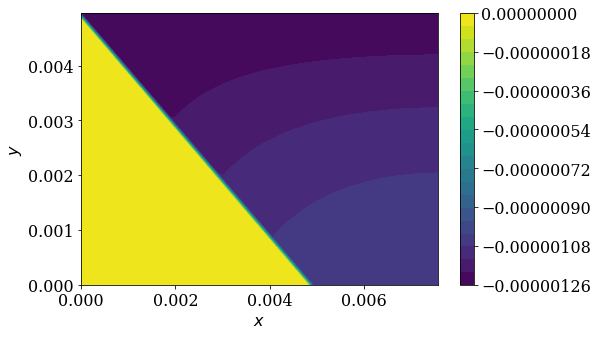

In [7]:
x = numpy.linspace(0,dx*(N+1),N+1)
y = numpy.linspace(dx*(N-M),0,N-M)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B_T2,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

##  Reconstruction de la figure symétrique et visualisation globale

In [8]:
def recompose(B):
    
    B_paire = B[:,:-1]
    l = len(B_paire[0,:]) # N
    k = len(B_paire[:,0]) # N-M
    B_complet = numpy.zeros((2*l+1,2*l+1))
    
    #agrandir le pavé élémentaire pour avoir une matrice carrée (B1)
    extra = numpy.zeros((l-k,l))
    B1 = numpy.concatenate((B_paire,extra),axis=0)
    
    #transposer et additionner pour avoir les bonnes valeurs dans le triangle inférieur
    B1_t = numpy.transpose(B1)
    B2 = B1_t + B1
    for i in range(0,l-1):  
        B2[i,i] = B2[i,i]/2
    
    B_complet[0:l,0:l] = B2
    
    #symétrie d'axe Ox 
    B_complet[l+1::,0:l] = numpy.flipud(B2)
    
    #symétrie d'axe Oy partie haut
    B_complet[0:l,l+1::] = numpy.fliplr(B2)
    
    #symétrie d'axe Oy partie bas
    B_complet[l+1::,l+1::] = numpy.fliplr(B_complet[l+1::,0:l])
    
    #insertion des lignes et colonnes centrales # vivent les multiples de 2
    B_complet[0:k,l] = B[:,-1]
    B_complet[2*l+1-k:2*l+1,l] = numpy.flipud(B[:,-1])
    B_complet[l,0:k] = numpy.transpose(B[:,-1])
    B_complet[l,2*l+1-k:2*l+1] = numpy.flipud(numpy.transpose(B[:,-1]))
    
    return B_complet

In [9]:
B_complet = recompose(B)
B_T2_complet = recompose(B_T2)

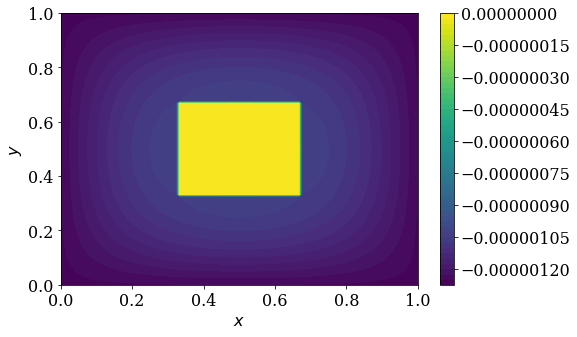

In [10]:
x = numpy.linspace(0,1,2*N+1)
y = numpy.linspace(1,0,2*N+1)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B_T2_complet,50,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

##  Extraction des valeurs demandées pour $\mathbf B$ et $\mathbf J$

In [11]:
xIndex = int(2.5*10**-3/dx)
yIndex = int((1.5*10**-2 - 2.5*10**-3)/dx)

print("La valeur du champ magnétique en (2.5e-3 m, 2.5e-3 m, 0m) après 1.25e-3 s est :", B_T2_complet[xIndex,yIndex], "T")

La valeur du champ magnétique en (2.5e-3 m, 2.5e-3 m, 0m) après 1.25e-3 s est : -1.16749256234e-06 T


Pour calculer le courant à cet endroit, nous allons calculer le rotationnel à l'aide d'une dérivée discrète. Le rotationnel de $\mathbf B$ est donné par 

$$\nabla\times\mathbf B = \partial _y B \ \mathbf u_x - \partial _x B \ \mathbf u_y \qquad B:=B_z$$

Et s'approxime donc en (i,j) par

$$ \nabla\times\mathbf B = \frac{B[i-1,j]-B[i+1,j]}{2\Delta y}\ \mathbf u_x + \frac{B[i,j+1]-B[i,j-1]}{2\Delta x}\ \mathbf u_y$$

In [12]:
rotB = numpy.zeros(3)
rotB[0] = (B_T2_complet[xIndex-1,yIndex] - B_T2_complet[xIndex+1,yIndex])/2/dx
rotB[1] = (B_T2_complet[xIndex,yIndex+1] - B_T2_complet[xIndex,yIndex-1])/2/dx

currentDensity = 1/mu*rotB

print("La valeur de la densité de courant électrique en (2.5e-3 m, 2.5e-3 m, 0 m) après 1.25e-3 s est : \n", currentDensity, "A/m^2")

La valeur de la densité de courant électrique en (2.5e-3 m, 2.5e-3 m, 0 m) après 1.25e-3 s est : 
 [-23.80136389 -23.80136389   0.        ] A/m^2


##  Extraction des valeurs demandées pour le flux de $\mathbf B$

Nous obtenons le flux en sommant la valeur de $B$ sur chaque élément de surface et en pondérant par l'aire de cet élément.

In [13]:
flux = 0

for i in range(N):
    
    flux += 4*B_complet[i,i]
    flux += 4*B_complet[i,N]
    
    for j in range(i+1,N):
        
        flux += 8*B_complet[i,j]
        
flux = flux*dx**2

print("Le flux du champ magnétique à travers la section z=0 du conducteur vaut :", flux, "Tm^2")

Le flux du champ magnétique à travers la section z=0 du conducteur vaut : -2.50950071589e-10 Tm^2


Nous pouvons comparer cela à la valeur théorique du flux une fois que le champ magnétique est totalement diffusé (uniforme, égal à $\mu(1 A/m^2)$), qui vaut

$$ flux = BS = -\mu_0(1 A/m^2)(1.5^2-0.5^2)\times 10^{-4}m^2 = -2.52\times 10^{-10} Tm^2$$

Ce qui est comme attendu à peine plus élevé en valeur absolue que le flux trouvé numériquement. En effet, après $0.0125$s, le champ magnétique est presque entièrement diffusé.

### Animation

In [14]:
from matplotlib import animation
from IPython.display import HTML

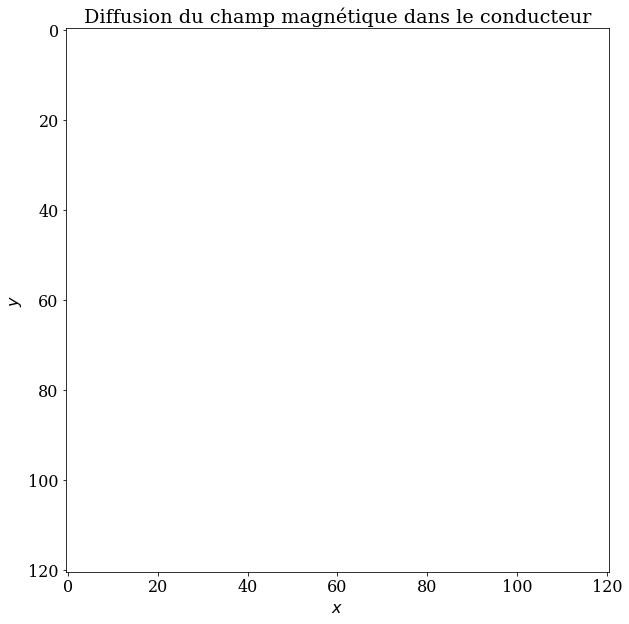

In [17]:
fig = pyplot.figure(figsize=(10,10))
pyplot.title('Diffusion du champ magnétique dans le conducteur')
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')

ims = []
for i in range(int(T2/dt/10)+1): 
    im = pyplot.imshow(recompose(valeurs_physiques(B_data[i])), animated = True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10)

# ani.save('diffusion_B.mp4')

In [18]:
HTML(ani.to_html5_video())